# Vortex Indicator

https://www.barchart.com/education/technical-indicators/vortex

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-09-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-04,57.102501,57.294998,56.657501,57.090000,54.461624,109560400
2018-09-05,57.247501,57.417500,56.275002,56.717499,54.106266,133332000
2018-09-06,56.557499,56.837502,55.325001,55.775002,53.207161,137160000
2018-09-07,55.462502,56.342499,55.177502,55.325001,52.777882,150479200
2018-09-10,55.237499,55.462502,54.117500,54.582500,52.069561,158066000


In [3]:
# Calculate True Range (TR)
df['High-Low'] = df['High'] - df['Low']
df['High-PreviousClose'] = np.abs(df['High'] - df['Close'].shift(1))
df['Low-PreviousClose'] = np.abs(df['Low'] - df['Close'].shift(1))
df['TR'] = df[['High-Low', 'High-PreviousClose', 'Low-PreviousClose']].max(axis=1)

# Calculate VM+ and VM-
df['VM+'] = np.abs(df['High'] - df['Low'].shift(1))
df['VM-'] = np.abs(df['Low'] - df['High'].shift(1))

# Define the parameter length
n = 14  # You can change this value to any number between 14 and 30

# Calculate SUM TRn, SUM VMn+, and SUM VMn-
df['SUM TRn'] = df['TR'].rolling(window=n).sum()
df['SUM VMn+'] = df['VM+'].rolling(window=n).sum()
df['SUM VMn-'] = df['VM-'].rolling(window=n).sum()

# Calculate VIn+ and VIn-
df['VI+'] = df['SUM VMn+'] / df['SUM TRn']
df['VI-'] = df['SUM VMn-'] / df['SUM TRn']

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,High-Low,High-PreviousClose,Low-PreviousClose,TR,VM+,VM-,SUM TRn,SUM VMn+,SUM VMn-,VI+,VI-
Date,,,,,,,,,,,,,,,,,
2018-09-04,57.102501,57.294998,56.657501,57.090000,54.461624,109560400,0.637497,NaN,NaN,0.637497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-05,57.247501,57.417500,56.275002,56.717499,54.106266,133332000,1.142498,0.327499,0.814999,1.142498,0.759998,1.019997,NaN,NaN,NaN,NaN,NaN
2018-09-06,56.557499,56.837502,55.325001,55.775002,53.207161,137160000,1.512501,0.120003,1.392498,1.512501,0.562500,2.092499,NaN,NaN,NaN,NaN,NaN
2018-09-07,55.462502,56.342499,55.177502,55.325001,52.777882,150479200,1.164997,0.567497,0.597500,1.164997,1.017498,1.660000,NaN,NaN,NaN,NaN,NaN
2018-09-10,55.237499,55.462502,54.117500,54.582500,52.069561,158066000,1.345001,0.137501,1.207500,1.345001,0.285000,2.224998,NaN,NaN,NaN,NaN,NaN


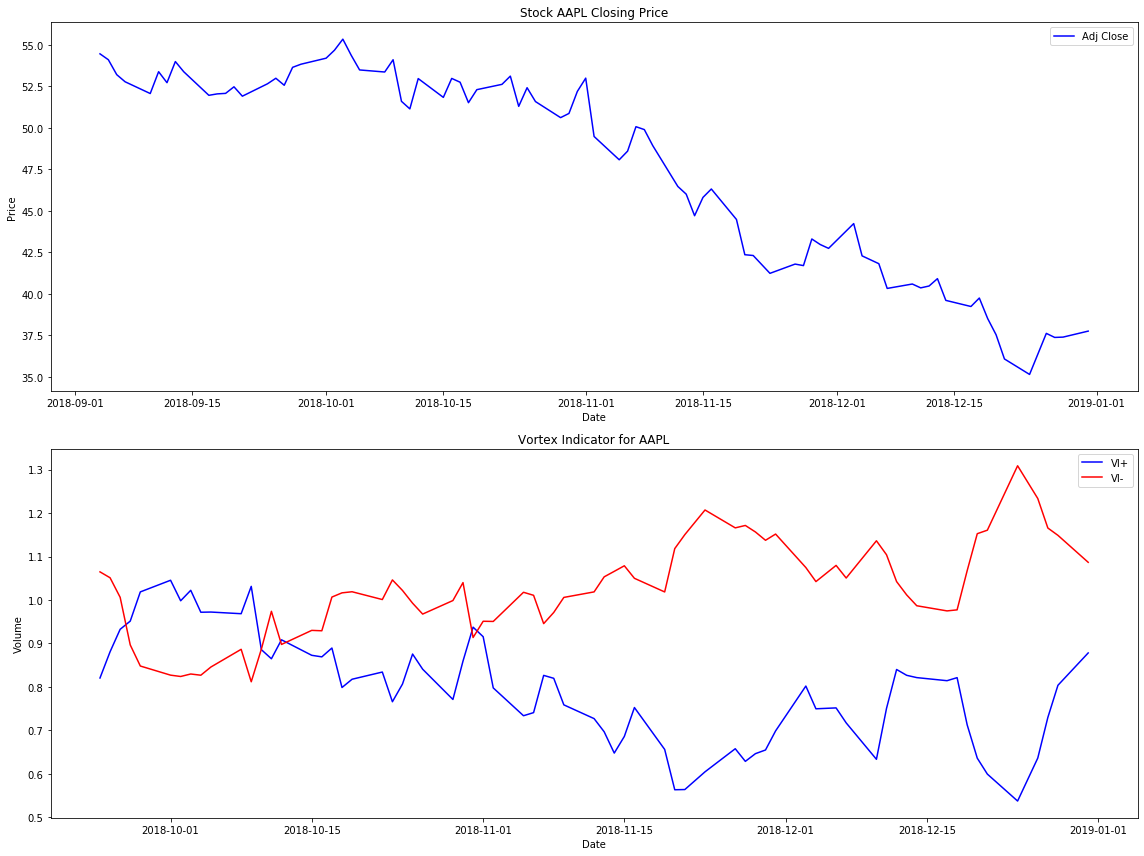

In [5]:
fig = plt.figure(figsize=(16, 12))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'], label='Adj Close', color='blue')
ax1.set_title('Stock ' + symbol + ' Closing Price')
ax1.legend(loc='best')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df.index, df['VI+'], label='VI+', color='blue')
ax2.plot(df.index, df['VI-'], label='VI-', color='red')
ax2.set_title(f'Vortex Indicator for {symbol}')
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

plt.tight_layout()
plt.show()

## Candlestick with Vortex Indicator

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,High-Low,High-PreviousClose,Low-PreviousClose,TR,VM+,VM-,SUM TRn,SUM VMn+,SUM VMn-,VI+,VI-,VolumePositive
0,736941.0,57.102501,57.294998,56.657501,57.090000,54.461624,109560400,0.637497,NaN,NaN,0.637497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,736942.0,57.247501,57.417500,56.275002,56.717499,54.106266,133332000,1.142498,0.327499,0.814999,1.142498,0.759998,1.019997,NaN,NaN,NaN,NaN,NaN,False
2,736943.0,56.557499,56.837502,55.325001,55.775002,53.207161,137160000,1.512501,0.120003,1.392498,1.512501,0.562500,2.092499,NaN,NaN,NaN,NaN,NaN,False
3,736944.0,55.462502,56.342499,55.177502,55.325001,52.777882,150479200,1.164997,0.567497,0.597500,1.164997,1.017498,1.660000,NaN,NaN,NaN,NaN,NaN,False
4,736947.0,55.237499,55.462502,54.117500,54.582500,52.069561,158066000,1.345001,0.137501,1.207500,1.345001,0.285000,2.224998,NaN,NaN,NaN,NaN,NaN,False


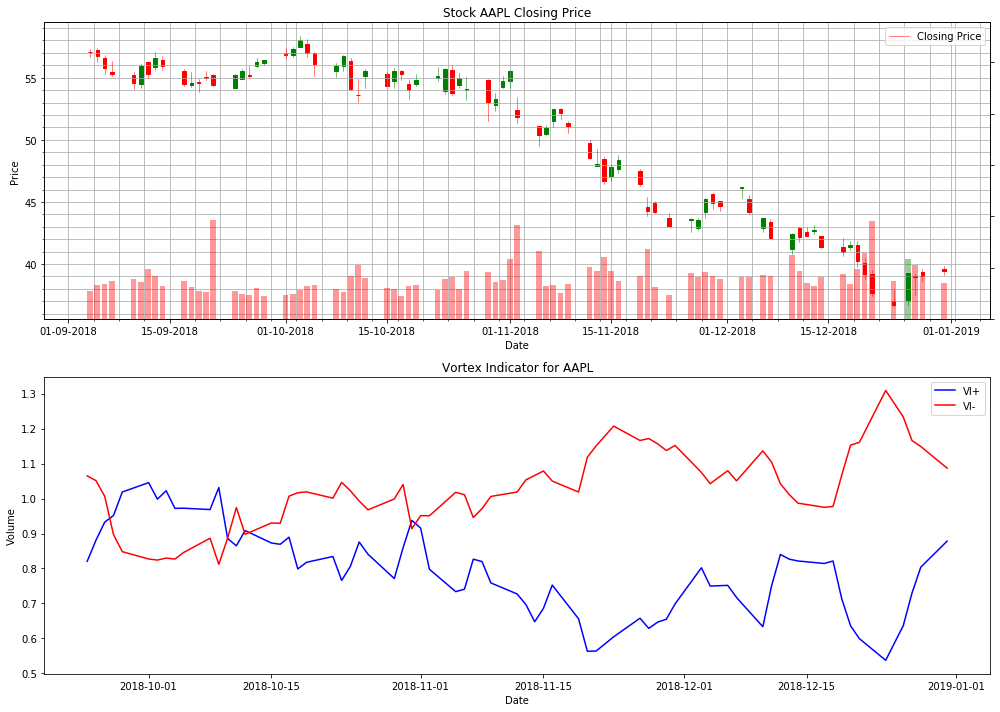

In [7]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1, dfc[['Date', 'Open', 'High', 'Low', 'Close']].values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3 * dfc.Volume.max())
ax1.set_title('Stock ' + symbol + ' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(['Closing Price'], loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df.index, df['VI+'], label='VI+', color='blue')
ax2.plot(df.index, df['VI-'], label='VI-', color='red')
ax2.set_title(f'Vortex Indicator for {symbol}')
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

plt.tight_layout()
plt.show()

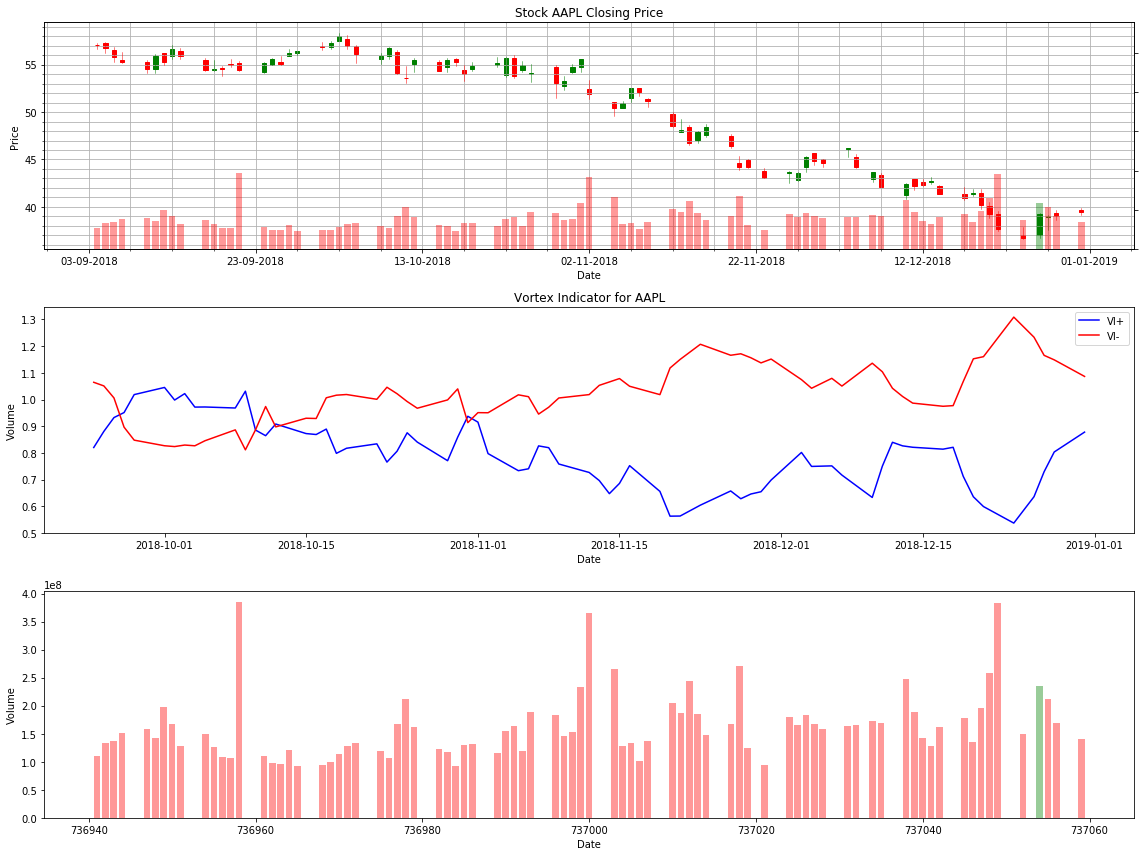

In [8]:
fig = plt.figure(figsize=(16,12))
ax1 = plt.subplot(3, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df.index, df['VI+'], label='VI+', color='blue')
ax2.plot(df.index, df['VI-'], label='VI-', color='red')
ax2.set_title(f'Vortex Indicator for {symbol}')
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

# Second subplot with Volume
ax3 = plt.subplot(3, 1, 3)
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax3.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax3.set_ylabel('Volume')
ax3.set_xlabel('Date')

plt.tight_layout()
plt.show()